In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from  nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv(r'C:\Users\VIRAJ\Desktop\amazonreviews.csv')

In [6]:
df.shape

(568454, 10)

In [7]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [9]:
df[df.Score==5].describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,363122.000000,363122.000000,363122.000000,363122.0,3.631220e+05
mean,285887.043393,1.675228,1.874108,5.0,1.294306e+09
std,163879.962191,7.585833,7.911169,0.0,4.918334e+07
min,1.000000,0.000000,0.000000,5.0,9.393408e+08
25%,144354.250000,0.000000,0.000000,5.0,1.267229e+09
50%,287333.000000,0.000000,0.000000,5.0,1.309133e+09
75%,427571.500000,2.000000,2.000000,5.0,1.332029e+09
max,568454.000000,866.000000,878.000000,5.0,1.351210e+09


In [10]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

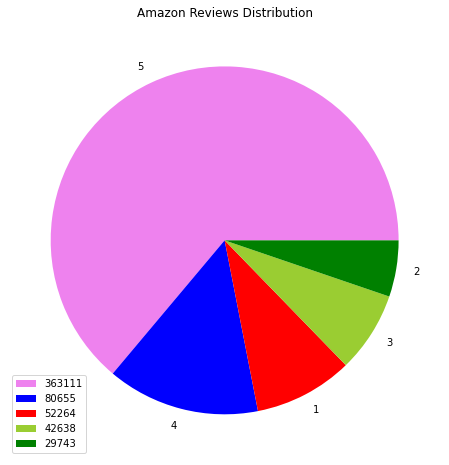

In [13]:
plt.figure(figsize=(8,8))
ratings=df.Score.value_counts()
value=ratings.values
rating_number=ratings.index
colour_palette=['violet','blue','red','yellowgreen','green']
plt.pie(ratings,labels=rating_number,colors=colour_palette)
plt.title('Amazon Reviews Distribution')
plt.legend(value)
plt.show()

+ Most of the customers gave gave 5 star rating for products in amazon

In [14]:
df.duplicated().sum()

0

+ There are no repeated rows in the dataset

In [15]:
sentiments=SentimentIntensityAnalyzer()
df['positive']=[sentiments.polarity_scores(i)['pos'] for i in df['Text']]
df['neutral']=[sentiments.polarity_scores(i)['neu'] for i in df['Text']]
df['negative']=[sentiments.polarity_scores(i)['neg'] for i in df['Text']]
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,positive,neutral,negative
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.305,0.695,0.000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.000,0.862,0.138
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.155,0.754,0.091
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.448,0.552,0.000


In [16]:
a=sum(df['positive'])
b=sum(df['neutral'])
c=sum(df['negative'])
def scores(x,y,z):
    if x>y and x>z:
        print('positive')
    if y>x and y>z:
        print('neutral')
    else:
        print('negative')
scores(a,b,c)

neutral


In [17]:
print("positive:",a)
print('neutral:',b)
print('negative:',c)

positive: 109328.1269999992
neutral: 435043.95799998916
negative: 24033.022999999564


In [18]:
df.Score.value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

In [19]:
fl=df[["Text"]]
fl

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
568449,Great for sesame chicken..this is a good if no...
568450,I'm disappointed with the flavor. The chocolat...
568451,"These stars are small, so you can give 10-15 o..."
568452,These are the BEST treats for training and rew...


In [20]:
cl=df[["Score"]]
cl

,Score
0,5
1,1
2,4
3,2
4,5
...,...
568449,5
568450,2
568451,5
568452,5


In [21]:
stp=stopwords.words("english")

In [87]:
new_df=[]
for y in df["Text"]:
    l=[]
    z=y.lower()
    z=re.sub("[^a-z ]","",z)
    for word in word_tokenize(z):
        if word not in stp:
            nw=PorterStemmer().stem(word)
            l.append(nw)
    new_df.append(" ".join(l))

In [88]:
fv=pd.DataFrame({"cleaned_text":new_df})
fv

,cleaned_text
0,bought sever vital can dog food product found ...
1,product arriv label jumbo salt peanutsth peanu...
2,confect around centuri light pillowi citru gel...
3,look secret ingredi robitussin believ found go...
4,great taffi great price wide assort yummi taff...
...,...
568406,great sesam chickenthi good better restur eate...
568407,im disappoint flavor chocol note especi weak m...
568408,star small give one train session tri train do...
568409,best treat train reward dog good groom lower c...


In [89]:
cl=df[["Score"]]
cl

,Score
0,5
1,1
2,4
3,2
4,5
...,...
568449,5
568450,2
568451,5
568452,5


In [90]:
x_train,x_test,y_train,y_test=train_test_split(fv,cl,train_size=0.8)

In [91]:
x_train.head(2)

,cleaned_text
242031,addict tortilla chip good fact get automat eve...
19411,linguinestyl white rice noodl hard find usual ...


In [92]:
x_test.head(2)

,cleaned_text
285932,bought primarili backpack purpos product powde...
490830,coffe that purchas strong weak right also cont...


In [93]:
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
cv=CountVectorizer()
data_train=cv.fit_transform(x_train["cleaned_text"])
data_train

<454728x166405 sparse matrix of type '<class 'numpy.int64'>'
	with 15131309 stored elements in Compressed Sparse Row format>

In [95]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
mnb=MultinomialNB()
model=mnb.fit(data_train,y_train)

C:\Users\VIRAJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
data_test=cv.transform(x_test["cleaned_text"])

In [98]:
predict=model.predict(data_test)

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy=accuracy_score(y_test,predict)
accuracy

0.7143284396083848

In [108]:
data=pd.read_csv(r'C:\Users\VIRAJ\Downloads\amazonreviews1.csv')
data.drop("Id",inplace=True,axis=1)
data.head(3)

,cleaned_text
0,The product is very good
1,very bad quality worst product
2,"I am ok with the product,satisfied"


In [109]:
data.iloc[1].values

array(['very bad quality worst product'], dtype=object)

In [113]:
b=cv.transform(data.iloc[2].values).toarray()
b

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [114]:
model.predict(b)

array([5], dtype=int64)

In [119]:
model.predict(data_test[[5]])

array([5], dtype=int64)